In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing
import seaborn as sns

import missingno as msno

In [46]:
df = pd.read_csv("data/Training_set_values.csv")
label = pd.read_csv("data/training_set_labels.csv")

In [47]:
df = pd.merge(df,label, on = "id")
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [48]:
to_drop = ["funder","installer","payment","payment_type","wpt_name","recorded_by","num_private","extraction_type",
           "extraction_type_group","scheme_management","scheme_name","management",
          "quality_group","quantity_group","source","public_meeting","lga","ward",
           "subvillage","region_code","district_code","date_recorded","id",'status_group'
           ,"waterpoint_type_group","permit","construction_year","amount_tsh"]
df.drop(to_drop,inplace= True,axis =1)

In [49]:
X = df.iloc[0:59400,0:40]
y= df.iloc[0:59400,-1]

In [50]:
X

,gps_height,longitude,latitude,basin,region,population,extraction_type_class,management_group,water_quality,quantity,source_type,source_class,waterpoint_type
0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,109,gravity,user-group,soft,enough,spring,groundwater,communal standpipe
1,1399,34.698766,-2.147466,Lake Victoria,Mara,280,gravity,user-group,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,686,37.460664,-3.821329,Pangani,Manyara,250,gravity,user-group,soft,enough,dam,surface,communal standpipe multiple
3,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,submersible,user-group,soft,dry,borehole,groundwater,communal standpipe multiple
4,0,31.130847,-1.825359,Lake Victoria,Kagera,0,gravity,other,soft,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1210,37.169807,-3.253847,Pangani,Kilimanjaro,125,gravity,user-group,soft,enough,spring,groundwater,communal standpipe
59396,1212,35.249991,-9.070629,Rufiji,Iringa,56,gravity,user-group,soft,enough,river/lake,surface,communal standpipe
59397,0,34.017087,-8.750434,Rufiji,Mbeya,0,handpump,user-group,fluoride,enough,borehole,groundwater,hand pump
59398,0,35.861315,-6.378573,Rufiji,Dodoma,0,handpump,user-group,soft,insufficient,shallow well,groundwater,hand pump


In [51]:
y

0                 communal standpipe
1                 communal standpipe
2        communal standpipe multiple
3        communal standpipe multiple
4                 communal standpipe
                    ...             
59395             communal standpipe
59396             communal standpipe
59397                      hand pump
59398                      hand pump
59399                      hand pump
Name: waterpoint_type, Length: 59400, dtype: object

In [52]:
print(df.status_group.value_counts())

AttributeError: 'DataFrame' object has no attribute 'status_group'

In [53]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

In [43]:
def split_data_resampling(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    smote_enn = SMOTEENN(random_state=0)
    X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled

In [44]:
split_data_resampling(X,y)

ValueError: could not convert string to float: '2013-02-27'

In [ ]:
print(y_train_resampled.value_counts())

In [148]:
df[["population","longitude"]].head(22)

,population,longitude
0,109,34.938093
1,280,34.698766
2,250,37.460664
3,58,38.486161
4,0,31.130847
5,1,39.172796
6,0,33.362410
7,0,32.620617
8,0,32.711100
9,0,30.626991


In [138]:

from sklearn.preprocessing import StandardScaler

In [139]:
df[["amount_tsh","gps_height","longitude","latitude","population"]].head()

,amount_tsh,gps_height,longitude,latitude,population
0,6000.0,1390,34.938093,-9.856322,109
1,0.0,1399,34.698766,-2.147466,280
2,25.0,686,37.460664,-3.821329,250
3,0.0,263,38.486161,-11.155298,58
4,0.0,0,31.130847,-1.825359,0


In [140]:
def standarisation(columns):
    for col in columns:
        scaler= StandardScaler()
        df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1,1))
    return df[col]

In [141]:
columns_list = ["amount_tsh","gps_height","longitude","latitude","population"]
standarisation(columns_list)

0       -0.150399
1        0.212290
2        0.148660
3       -0.258570
4       -0.381587
           ...   
59395   -0.116463
59396   -0.262812
59397   -0.381587
59398   -0.381587
59399   -0.063439
Name: population, Length: 59400, dtype: float64

In [142]:
df[["amount_tsh","gps_height","longitude","latitude","population"]].head()

,amount_tsh,gps_height,longitude,latitude,population
0,1.895665,1.041252,0.131052,-1.408791,-0.150399
1,-0.105970,1.054237,0.094610,1.207934,0.212290
2,-0.097630,0.025541,0.515158,0.639751,0.148660
3,-0.105970,-0.584751,0.671308,-1.849720,-0.258570
4,-0.105970,-0.964200,-0.448669,1.317271,-0.381587


In [109]:
from sklearn.preprocessing import Normalizer

In [110]:
def standarisation(columns):
    for col in columns:
        scaler= StandardScaler()
        df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1,1))
    return df[col]

In [111]:
def normalization(columns):
    for col in columns:
        scaler= Normalizer()
        df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1,1))
    return df[col]

In [112]:
#num_columns = ["amount_tsh"]
columns_list = ["amount_tsh","gps_height","longitude","latitude","population"]
standarisation(columns_list)

0       -0.150399
1        0.212290
2        0.148660
3       -0.258570
4       -0.381587
           ...   
59395   -0.116463
59396   -0.262812
59397   -0.381587
59398   -0.381587
59399   -0.063439
Name: population, Length: 59400, dtype: float64

In [104]:
columns_list = ["amount_tsh","gps_height","longitude","latitude","population"]
normalization(columns_list)

0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
59395    1.0
59396    1.0
59397    0.0
59398    0.0
59399    1.0
Name: population, Length: 59400, dtype: float64

In [105]:
df[["amount_tsh","gps_height","longitude","latitude","population"]].head()

,amount_tsh,gps_height,longitude,latitude,population
0,1.0,1.0,1.0,-1.0,1.0
1,0.0,1.0,1.0,-1.0,1.0
2,1.0,1.0,1.0,-1.0,1.0
3,0.0,1.0,1.0,-1.0,1.0
4,0.0,0.0,1.0,-1.0,0.0


In [113]:
df[["amount_tsh","gps_height","longitude","latitude","population"]].head()

,amount_tsh,gps_height,longitude,latitude,population
0,1.895665,1.041252,0.131052,-1.408791,-0.150399
1,-0.105970,1.054237,0.094610,1.207934,0.212290
2,-0.097630,0.025541,0.515158,0.639751,0.148660
3,-0.105970,-0.584751,0.671308,-1.849720,-0.258570
4,-0.105970,-0.964200,-0.448669,1.317271,-0.381587


In [12]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,1.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,1.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
le = preprocessing.LabelEncoder()
le.fit(df["status_group"])
df["label"] =le.transform(df["status_group"])
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,label
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0


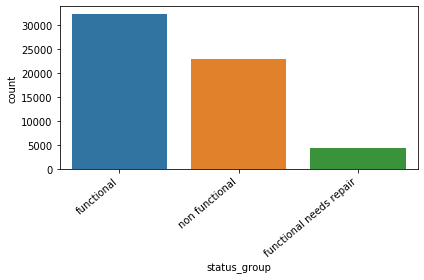

In [96]:
ax =sns.countplot(x = "status_group",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [97]:
print(df.status_group.value_counts()/len(df.status_group))
print(df.status_group.value_counts())

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


In [98]:
df.shape

(59400, 42)

In [99]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [100]:
df_copy = df.copy()

In [101]:
df_copy.replace(0, np.nan, inplace= True)
df_copy.isnull().sum()

id                           1
amount_tsh               41639
date_recorded                0
funder                    3635
gps_height               20438
installer                 3655
longitude                 1812
latitude                     0
wpt_name                     0
num_private              58643
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code               23
lga                          0
ward                         0
population               21381
public_meeting            8389
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                   20548
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

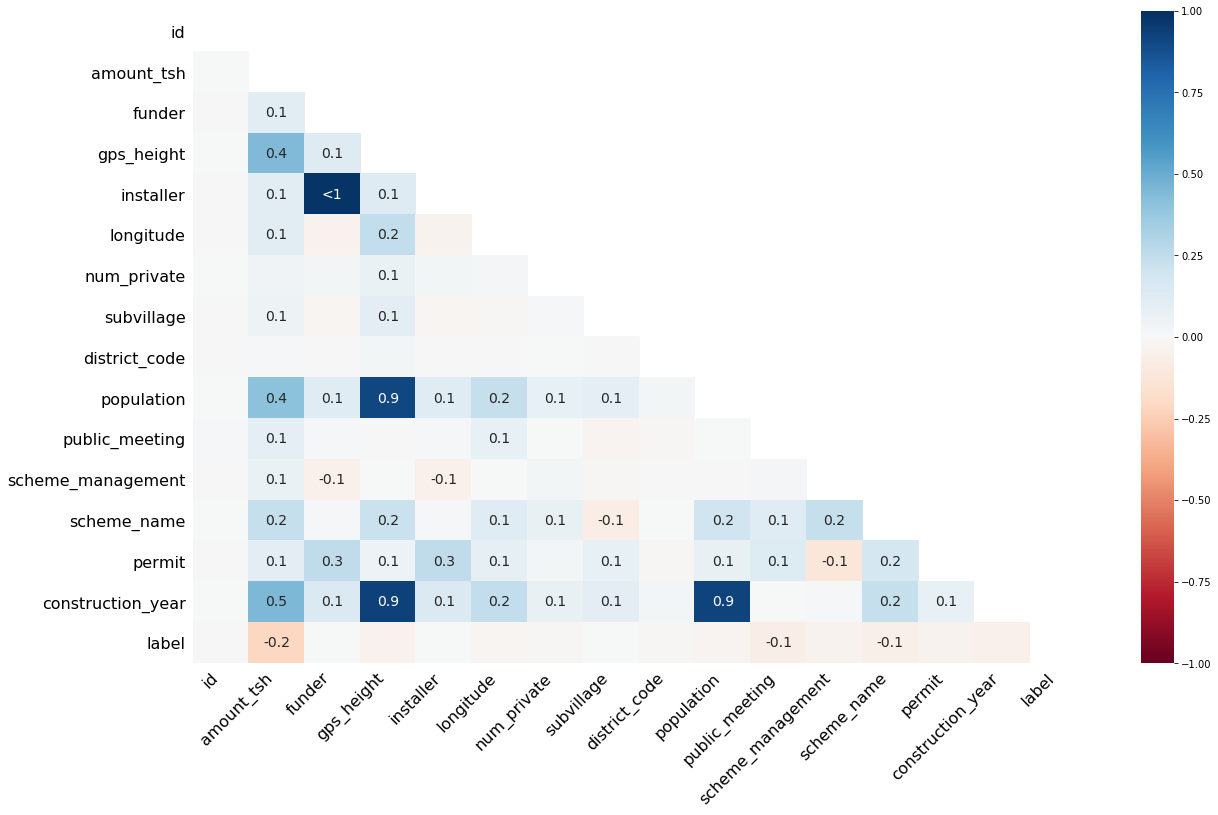

In [102]:
msno.heatmap(df_copy)

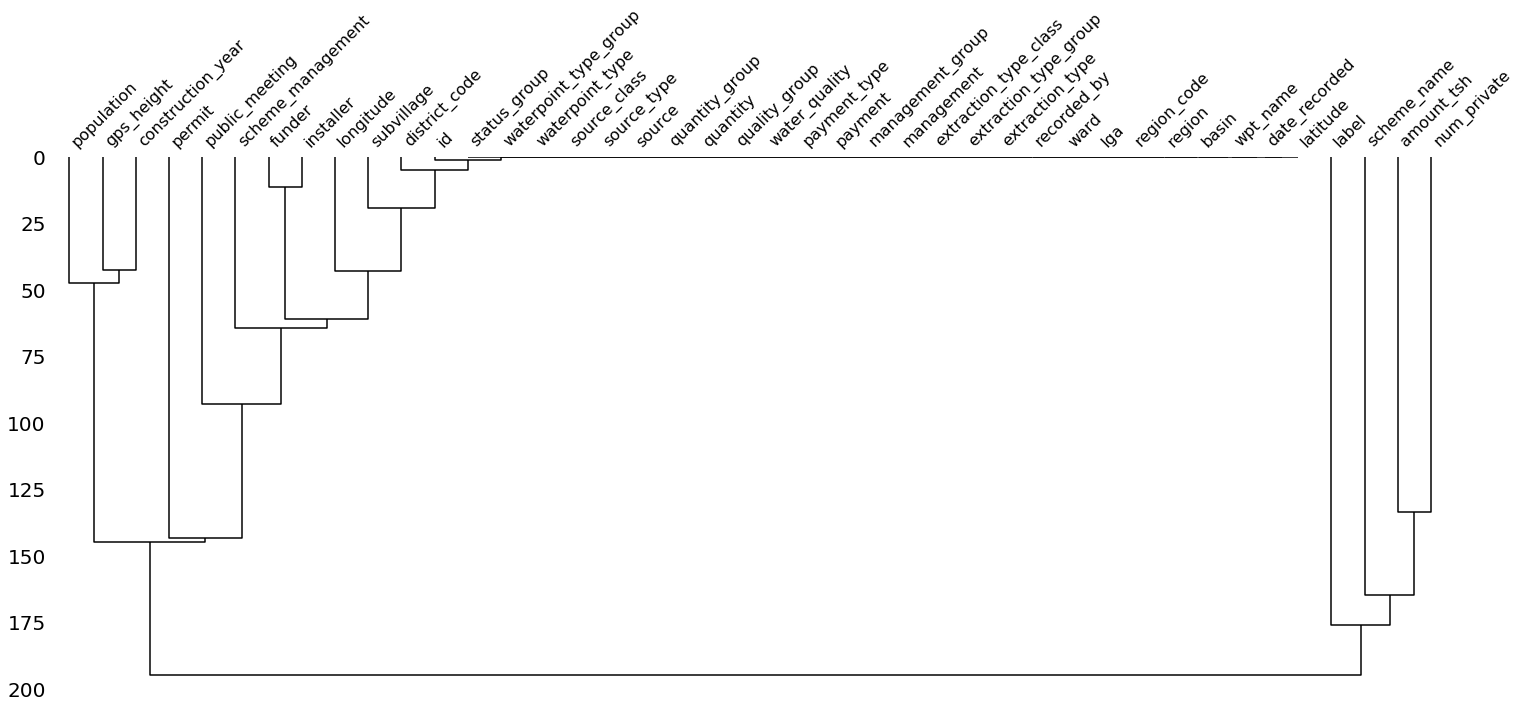

In [104]:
msno.dendrogram(df_copy)

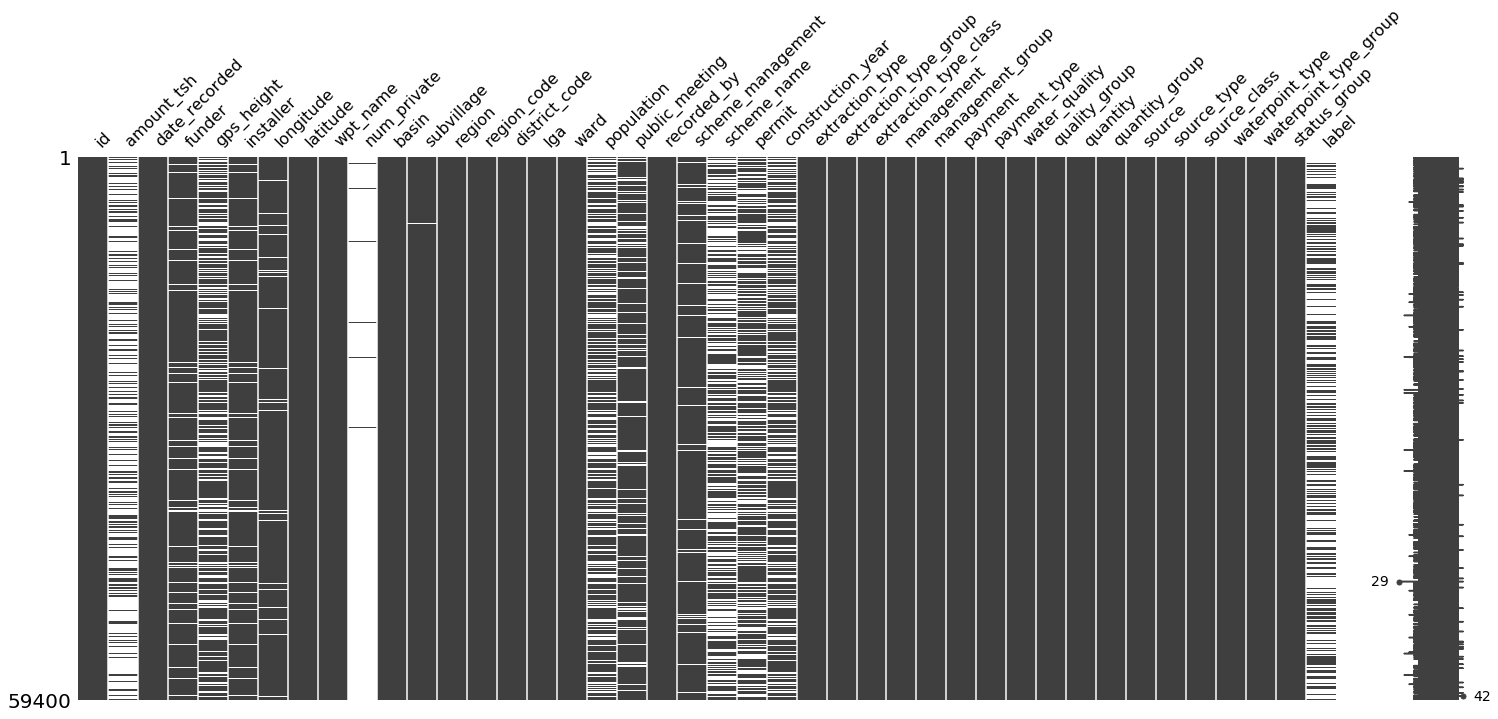

In [105]:
msno.matrix(df_copy)

# Missing not at random 

* Population and contruction year 
* GPS height and population
* installer and funder 

In [72]:
to_drop = ["payment_type","wpt_name","recorded_by","num_private","extraction_type",
           "extraction_type_group","scheme_management","scheme_name","management",
          "quality_group","quantity_group","source","public_meeting","lga","ward",
           "subvillage","region_code","district_code","date_recorded","id",'status_group'
           ,"waterpoint_type_group","permit","construction_year"]
df.drop(to_drop,inplace= True,axis =1)

In [73]:
print(len(df.columns))
print(df.columns)

17
Index(['amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'population', 'extraction_type_class',
       'management_group', 'payment', 'water_quality', 'quantity',
       'source_type', 'source_class', 'waterpoint_type', 'label'],
      dtype='object')


In [74]:
pd.set_option('display.max_columns', None)
df.columns

Index(['amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'population', 'extraction_type_class',
       'management_group', 'payment', 'water_quality', 'quantity',
       'source_type', 'source_class', 'waterpoint_type', 'label'],
      dtype='object')

In [21]:
# keep top 10 of funder and installer

def installer_cl(df):
    if df['installer']=="DWE":
        return 'dwe'
    elif df['installer']=="Government":
        return 'gov'
    elif df['installer']=="RWE":
        return "rwe"
    elif df['installer']=="Commu":
        return"commu"
    elif df['installer']=="DANIDA":
        return"danida"
    elif df['installer']=="KKKT":
        return "kkkt"
    elif df['installer']=="Hesawa":
        return "hesewa"
    elif df['installer']=="0":
        return "unknown"
    elif df['installer']=="TCRS":
        return"tcrs"
    elif df['installer']=="Central government":
        return "central gov" 
    elif df['installer']=="NaN":
        return "nan"
    else:
        return "others"
df['installer_group'] = df.apply(lambda df: installer_cl(df), axis=1)

In [22]:
def funder_cl(df):
    if df['funder']=="Government Of Tanzania":
        return 'gov of Tanzania'
    elif df['funder']=="Danida":
        return 'danida'
    elif df["funder"]=="Hesawa":
        return "hesawa"
    elif df['funder']=="Rwssp":
        return"rwssp"
    elif df['funder']=="World Vision":
        return"world vision"
    elif df['funder']=="Unicef":
        return "unicef"
    elif df['funder']=="Hesawa":
        return "hesewa"
    elif df['funder']=="Tasaf":
        return "tasaf"
    elif df['funder']=="District Council":
        return"district council"
    elif df['funder']=="Kkkt":
        return "kkkt" 
    elif df['funder']=="NaN":
        return "nan"
    elif df["funder"]=="0":
        return "unknown"
    else:
        return "others"
df['funder_group'] = df.apply(lambda df: installer_cl(df), axis=1)

In [23]:
# Grouping

def year_cl(df):
    if df["construction_year"]==0:
        return 'unknown'
    elif 1960 <= df["construction_year"]<=1969:
        return "60s"
    elif 1970 <= df["construction_year"]<=1979:
        return "70s"
    elif 1980 <= df["construction_year"]<=1989:
        return "80s"
    elif 1990 <= df["construction_year"]<=1999:
        return "90s"
    elif 2000 <= df["construction_year"]<=2009:
        return "00s"
    elif 2010 <= df["construction_year"]<=2019:
        return "10s"

df['construction_year_new'] = df.apply(lambda df: year_cl(df), axis=1)

In [24]:
# Population zero or not zero

def pop_cl(df):
    if df["population"]==0:
        return "1"
    else:
        return "0"
df["population_zero"] = df.apply(lambda df:pop_cl(df),axis =1)

In [25]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,label,installer_group,funder_group,construction_year_new,population_zero
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,spring,groundwater,communal standpipe,communal standpipe,functional,0,others,others,90s,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,others,others,10s,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,dam,surface,communal standpipe multiple,communal standpipe,functional,0,others,others,00s,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2,others,others,80s,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0,others,others,unknown,1


In [26]:
def pay_cl(df):
    if df["payment"]=="never pay":
        return "NeverPay"
    elif df["payment"]=="unknown":
        return "Unknown"
    else:
        return "Pay"
df["pay_category"] = df.apply(lambda df:pay_cl(df),axis =1)

# Popoulation Zero Region
* Pwani, Singida,Arusha (Zero)
* Kigoma, Rukwa (Nearly Zero)

In [5]:
n_f_pop=df.loc[(df["population"]==0)& (df["status_group"]==2)]
repair_pop=df.loc[(df["population"]==0)& (df["status_group"]==1)]

In [9]:
pop_zero =df.loc[(df["population"]==0)]
print("population zero percentage : ",len(pop_zero)/len(df))

population zero percentage :  0.35994949494949496


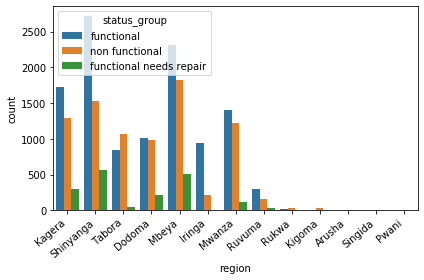

In [10]:
ax =sns.countplot(x = "region",hue="status_group",data=pop_zero)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Population zero and construction year correlation 
* "if popularion is zero, construction year will be unknown 

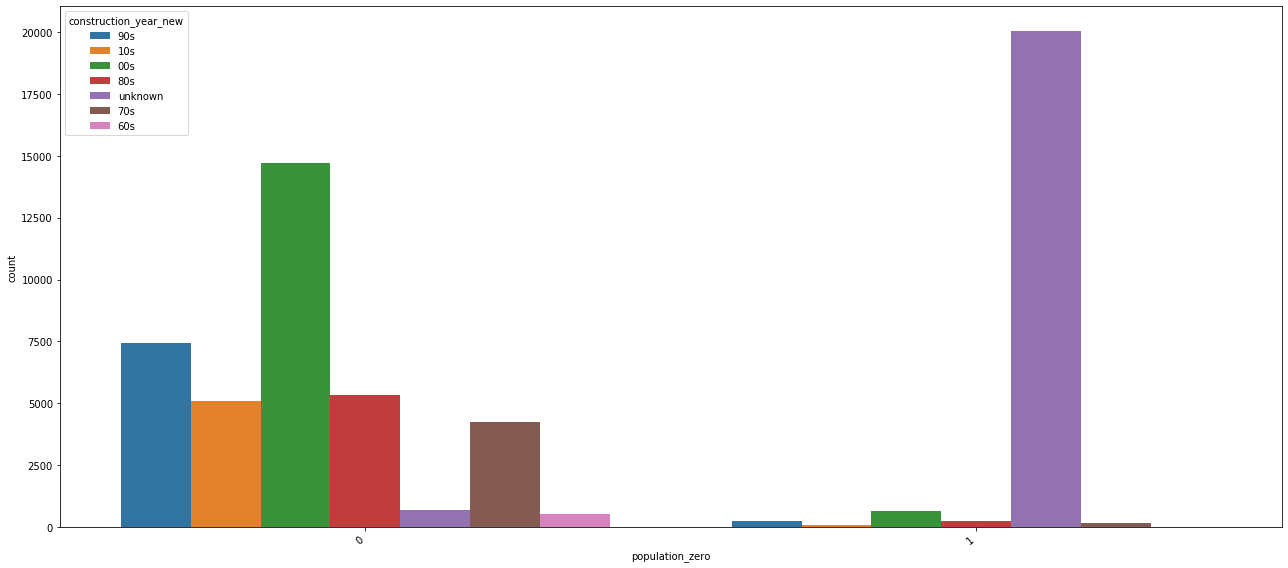

In [116]:
plt.figure(figsize=(18,8))
ax =sns.countplot(x = "population_zero",hue="construction_year_new",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Check Basin(where pumps use water from)
# !!!!To plot and check map 

* lake victoria, lake tanganyika, ruvuma , 50% high nonf/repair 

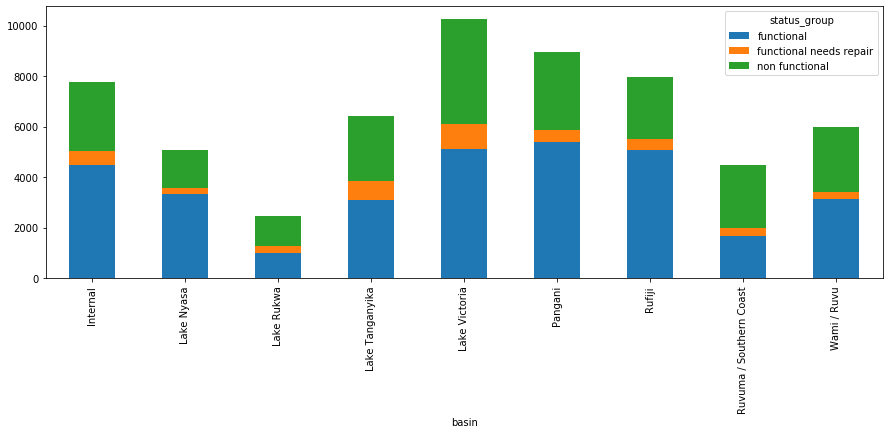

In [16]:
pd.crosstab(df.basin, df.status_group).plot.bar(stacked=True, figsize=(15,5));

# Payment status

* non functional have more "NeverPay"

In [14]:
df.pay_category.value_counts()/len(df.pay_category)

Pay         0.435943
NeverPay    0.426734
Unknown     0.137323
Name: pay_category, dtype: float64

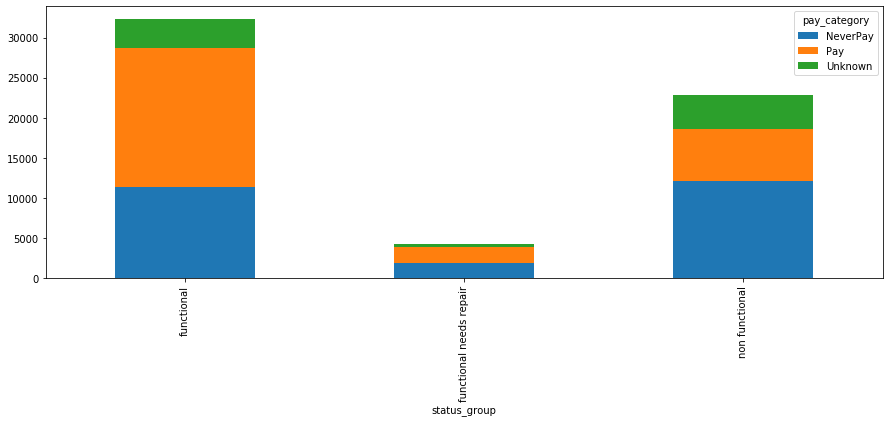

In [45]:
pd.crosstab(df.status_group, df.pay_category).plot.bar(stacked=True, figsize=(15,5));

In [5]:
df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

# Funder and installer Top10

* DWE

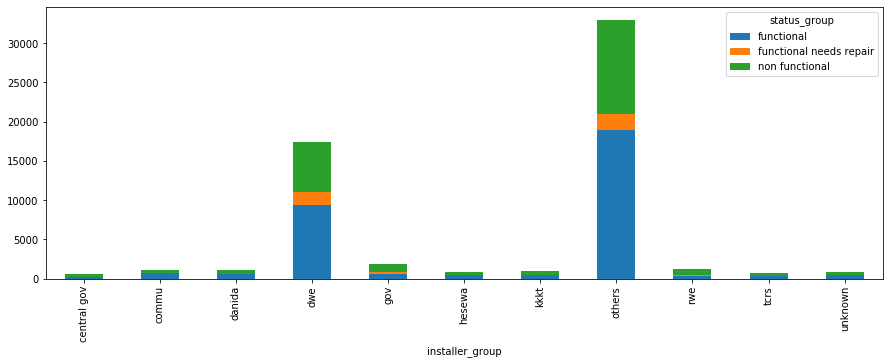

In [50]:
pd.crosstab(df.installer_group, df.status_group).plot.bar(stacked=True, figsize=(15,5));

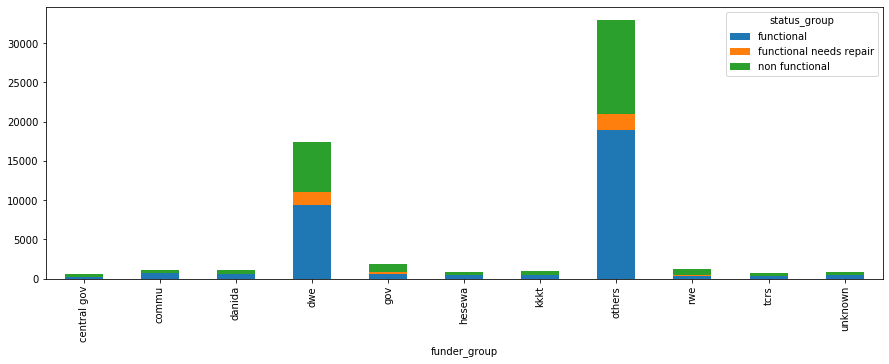

In [51]:
pd.crosstab(df.funder_group, df.status_group).plot.bar(stacked=True, figsize=(15,5));

# !!!check "8"'s condition = (non func)

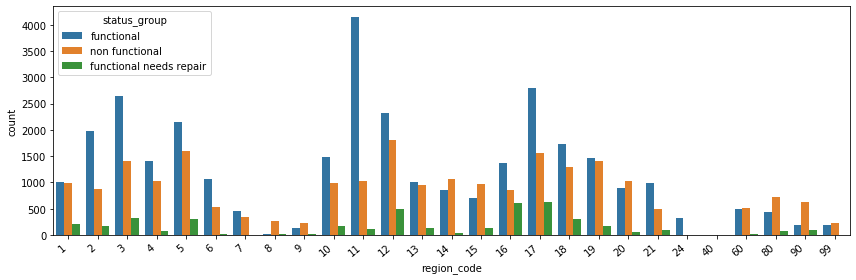

In [28]:
plt.figure(figsize=(12,4))

ax =sns.countplot(x = "region_code",hue="status_group",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

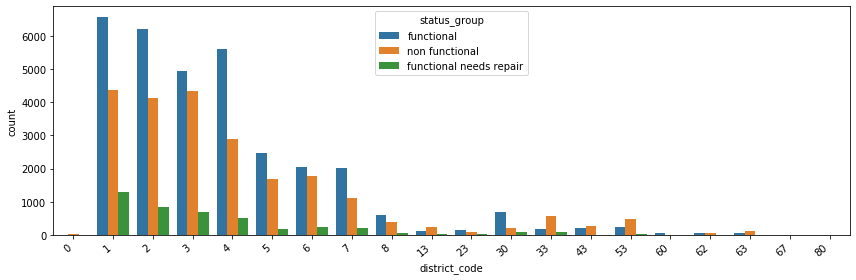

In [29]:
plt.figure(figsize=(12,4))

ax =sns.countplot(x = "district_code",hue="status_group",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

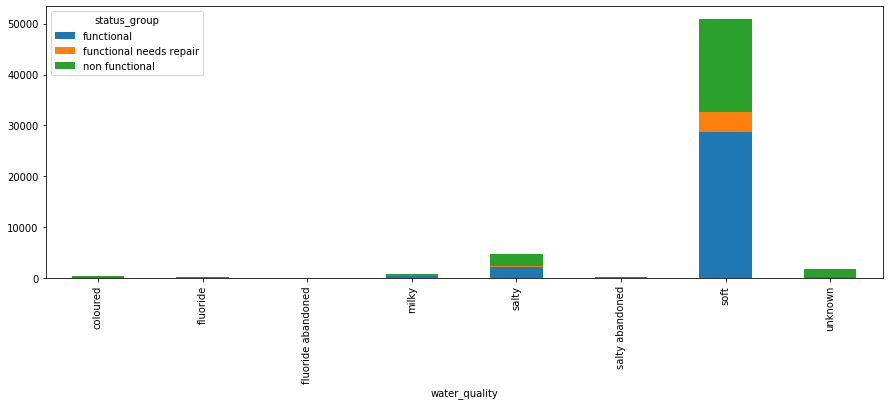

In [5]:
pd.crosstab(df.water_quality, df.status_group).plot.bar(stacked=True, figsize=(15,5));

In [6]:
pd.crosstab(df.water_quality, df.status_group, margins=True)

status_group,functional,functional needs repair,non functional,All
water_quality,,,,
coloured,246,54,190,490
fluoride,151,13,36,200
fluoride abandoned,6,0,11,17
milky,438,14,352,804
salty,2220,225,2411,4856
salty abandoned,174,72,93,339
soft,28760,3904,18154,50818
unknown,264,35,1577,1876
All,32259,4317,22824,59400


* Most of the water quality is soft (good)
* water_quality : Unknow and salty seems to be good predictors

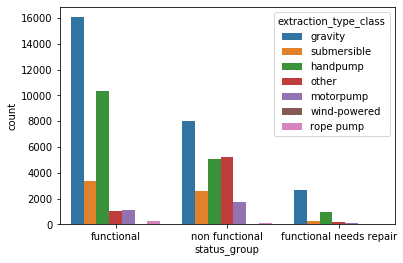

In [7]:
sns.countplot(x = "status_group", hue="extraction_type_class", data = df)

* Pump type: non func group has majority of "other"

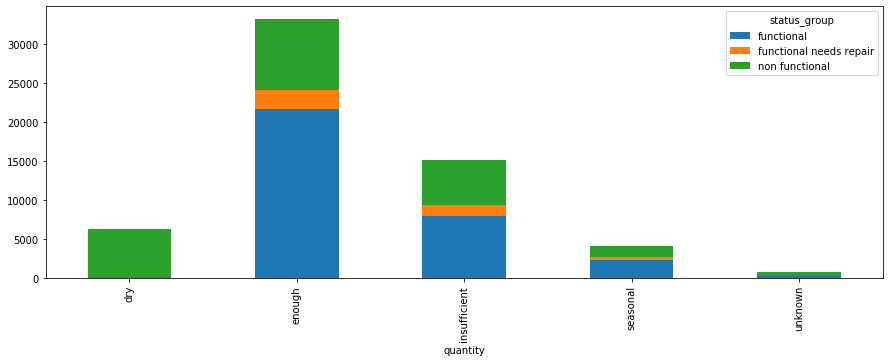

In [8]:
pd.crosstab(df.quantity, df.status_group).plot.bar(stacked=True, figsize=(15,5));

* Dry water cause non func

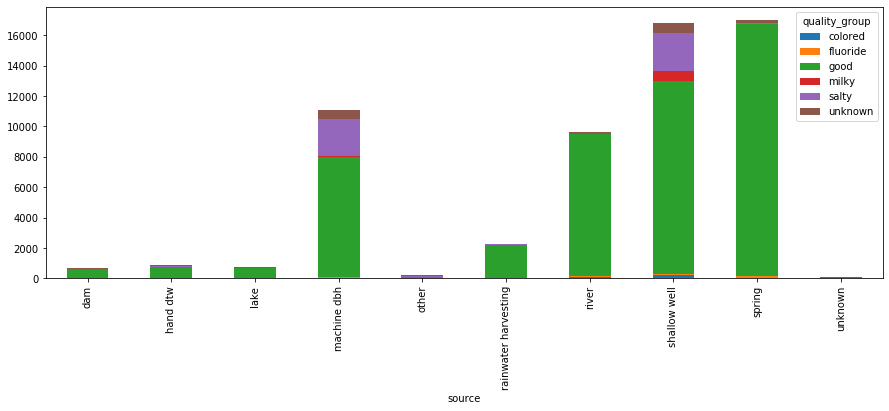

In [9]:
pd.crosstab(df.source, df.quality_group).plot.bar(stacked=True, figsize=(15,5));

*  Shallow well and Machine dbh has "unknown", "Salty water" and "milky" 

In [10]:
tanzania_date_recorded = pd.to_datetime(df.date_recorded)
tanzania_date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

* this data was created between Oct 2002 and Dec 2012